In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

### [1] Import the raw data set into a Pandas DataFrame.

In [4]:
# import dataset
diabetes = pd.read_csv(r"diabetes.csv")

### [2] Clean the data and remove missing values. Drop any column that is not categorical or numeric. Separate the independent variables from the dependent variables.

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

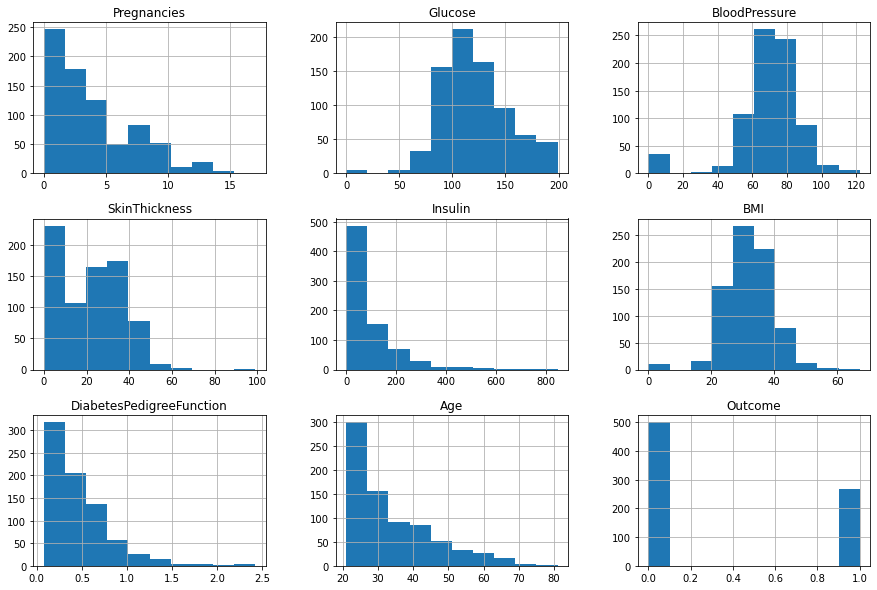

In [7]:
diabetes.hist(figsize=(15,10))

### [3] Generate dummy variables for the categorical features.

In [8]:
# there are no categorical variables

### [4] Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.

In [9]:
# create train and test arrays

# select columns to model with
model_df = diabetes.drop(["Outcome"], axis=1)

# select target column
target_col = diabetes["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(model_df, target_col, test_size=0.25, random_state=0)

### [5] Train the model using the LogisticRegressionCV class, which has cross-validation capability built in. Use this to tune your Cs hyperparameter. What value of this hyperparameter performs best in cross-validation?

In [10]:
# iterate through different k-fold numers 2-10 to test best outcomes
for k in range(2,10):
    clf = LogisticRegressionCV(Cs=k, random_state=0, max_iter=1000).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"Score for C={k} is: {score}")

Score for C=2 is: 0.8020833333333334
Score for C=3 is: 0.796875
Score for C=4 is: 0.8020833333333334
Score for C=5 is: 0.796875
Score for C=6 is: 0.8020833333333334
Score for C=7 is: 0.8020833333333334
Score for C=8 is: 0.7916666666666666
Score for C=9 is: 0.796875


### [6] After cross-validation, use your model to generate predictions on the test set, then create a confusion matrix from those results. Print the Matthews correlation coefficient.

In [11]:
# use Cs = 6 value for prediction
clf = LogisticRegressionCV(Cs=6, random_state=0, max_iter=1000).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Score is: {score}")

Score is: 0.8020833333333334


In [12]:
# create dataframe from values
prediction = clf.predict(X_test)
d={"prediction": prediction, "y_test": y_test.values}
confusion_df = pd.DataFrame(d)

In [13]:
# create confusion matrix
confusion_matrix(confusion_df["y_test"], confusion_df["prediction"])

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [14]:
# compute Mathews correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(confusion_df["y_test"], confusion_df["prediction"])

0.5273339157746447